# Tweaking the Model

## Import TensorFlow and related functions

In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Get the dataset

We'll once again use the dataset containing Amazon and Yelp reviews. This dataset was originally extracted from [here](https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set).

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2020-10-10 08:53:57--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.20.101, 74.125.20.138, 74.125.20.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/12p6eqmjg928k6vljg0hh7q4obcsqa8o/1602320025000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-10-10 08:53:58--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/12p6eqmjg928k6vljg0hh7q4obcsqa8o/1602320025000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|74.125.197

In [3]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

print(sentences[20])
print(labels[20])

I went on Motorola's website and followed all directions but could not get it to pair again.
0


In [4]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences)*0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
print(training_labels_final[0:10])
print(testing_labels_final[0:10])

[0 1 1 0 1 0 0 1 0 0]
[0 1 1 1 1 1 0 1 0 0]


## Tokenize the dataset (with tweaks!)
Now, we'll tokenize the dataset, but we can make some changes to this from before. Previously, we used:

In [6]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'

How might changing the vocab_size, embedding_dim or max_length affect how the model performs?

In [7]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding=padding_type,truncating=trunc_type)

In [10]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Train a Sentiment Model (with tweaks!)
We'll use a slightly different model here, using GlobalAveragePooling1D instead of Flatten().

In [8]:
model = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                    tf.keras.layers.GlobalAveragePooling1D(),
                    tf.keras.layers.Dense(6,activation='relu'),
                    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5229 - val_loss: 0.6991 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5229 - val_loss: 0.7000 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5235 - val_loss: 0.6977 - val_accuracy: 0.4160
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.5342 - val_loss: 0.6944 - val_accuracy: 0.4637
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5731 - val_loss: 0.6886 - val_accuracy: 0.4987
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.6095 - val_loss: 0.6823 - val_accuracy: 0.5088
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6598 - val_loss: 0.6707 - val_accuracy: 0.5439
Epoch 8/30
50/50 [==

## Visualize the training graph
You can use the code below to visualize the training and validation accuracy while you try out different tweaks to the hyperparameters and model.

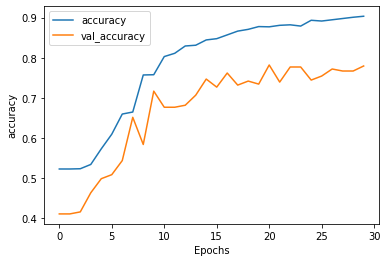

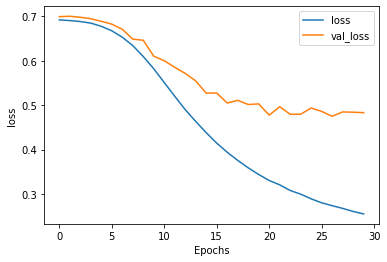

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualizing the network

The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the checkbox to "sphereize" the data.

Note: You may run into errors with the projection if your `vocab_size` earlier was larger than the actual number of words in the vocabulary, in which case you'll need to decrease this variable and re-train in order to visualize.

In [13]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [14]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

## Predicting Sentiment in New Reviews
Below, we've again included some example new reviews you can test your results on.



In [18]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head',
                'You cannot always be right for a wrong person',
                'You cannot always be right for a wrong person but the right one will find your worth',
                'My love for you was my greatest weakness']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head', 'You cannot always be right for a wrong person', 'You cannot always be right for a wrong person but the right one will find your worth', 'My love for you was my greatest weakness']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.90973103]


I hate spaghetti
[0.13508019]


Everything was cold
[0.54478866]


Everything was hot exactly as I wanted
[0.36512306]


Everything was green
[0.54478866]


the host seated us immediately
[0.54468715]


they gave us free chocolate cake
[0.84525853]


not sure about the wilted flowers on the table
[0.06632558]


only works when I stand on tippy toes
[0.8679421]


does not wo

## Create a subwords dataset

We can use the existing Amazon and Yelp reviews dataset with `tensorflow_datasets`'s `SubwordTextEncoder` functionality. `SubwordTextEncoder.build_from_corpus()` will create a tokenizer for us. You could also use this functionality to get subwords from a much larger corpus of text as well, but we'll just use our existing dataset here.

The Amazon and Yelp dataset we are using isn't super large, so we'll create a subword `vocab_size` of only the 1,000 most common words, as well as cutting off each subword to be at most 5 characters.

Check out the related documentation [here](https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder#build_from_corpus).

In [27]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences,vocab_size,max_subword_length=5)

In [28]:
# Check that the tokenizer works appropriately
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)
# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


## Replace sentence data with encoded subwords
Now, we'll re-create the dataset to be used for training by actually encoding each of the individual sentences. This is equivalent to text_to_sequences with the Tokenizer we used in earlier exercises.

In [29]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [30]:
# Check the sentences are appropriately replaced
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


## Final pre-processing
Before training, we still need to pad the sequences, as well as split into training and test sets.

In [31]:
import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

# Pad all sentences
sentences_padded = pad_sequences(sentences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences_padded[0:training_size]
testing_sentences = sentences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Train a Sentiment Model

In [32]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [33]:
num_epochs = 30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sentences, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_sentences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5217 - val_loss: 0.6955 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5279 - val_loss: 0.6983 - val_accuracy: 0.4211
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5512 - val_loss: 0.6933 - val_accuracy: 0.4737
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.6083 - val_loss: 0.6852 - val_accuracy: 0.5063
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6667 - val_loss: 0.6632 - val_accuracy: 0.6466
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.7326 - val_loss: 0.6444 - val_accuracy: 0.6642
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.5889 - accuracy: 0.7972 - val_loss: 0.6122 - val_accuracy: 0.7293
Epoch 8/30
50/50 [==

## Visualize the Training Graph

We can visualize the training graph below again. Does there appear to be a difference in how validation accuracy and loss is trending compared to with full words?

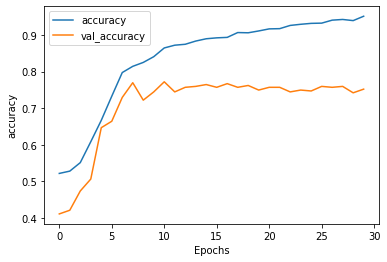

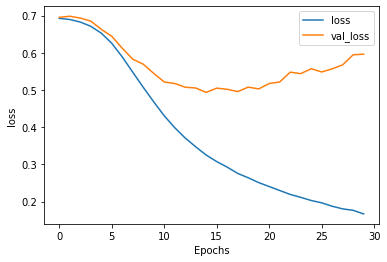

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

It Clearly shows that subwords is really struggling as the Vaidation Accuracy is goes down and is an indication of overfitting. 
This issue will be handled by RNNs.

## Get files for visualizing the network

Once again, you can visualize the sentiment related to all of the subwords using the below code and by heading to http://projector.tensorflow.org/ to upload and view the data.

Note that the below code does have a few small changes to handle the different way text is encoded in our dataset compared to before with the built in `Tokenizer`.

You may get an error like "Number of tensors (999) do not match the number of lines in metadata (992)." As long as you load the vectors first without error and wait a few seconds after this pops up, you will be able to click outside the file load menu and still view the visualization.

In [35]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [36]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, vocab_size - 1):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')